# **Import** **packages**

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
from scipy.stats import zscore as zscore

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# **Exploratory Data Analysis and Cleaning**

# **client_data.csv**

id = client company identifier

activity_new = category of the company’s activity

channel_sales = code of the sales channel

cons_12m = electricity consumption of the past 12 months

cons_gas_12m = gas consumption of the past 12 months

cons_last_month = electricity consumption of the last month

date_activ = date of activation of the contract

date_end = registered date of the end of the contract

date_modif_prod = date of the last modification of the product

date_renewal = date of the next contract renewal

forecast_cons_12m = forecasted electricity consumption for next 12 months

forecast_cons_year = forecasted electricity consumption for the next calendar 
year

forecast_discount_energy = forecasted value of current discount

forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 
months

forecast_price_energy_off_peak = forecasted energy price for 1st period (off 
peak)

forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

has_gas = indicated if client is also a gas client

imp_cons = current paid consumption

margin_gross_pow_ele = gross margin on power subscription

margin_net_pow_ele = net margin on power subscription

nb_prod_act = number of active products and services

net_margin = total net margin

num_years_antig = antiquity of the client (in number of years)

origin_up = code of the electricity campaign the customer first subscribed to

pow_max = subscribed power

churn = has the client churned over the next 3 months



# **price_data.csv**



id = client company identifier

price_date = reference date

price_off_peak_var = price of energy for the 1st period (off peak)

price_peak_var = price of energy for the 2nd period (peak)

price_mid_peak_var = price of energy for the 3rd period (mid peak)

price_off_peak_fix = price of power for the 1st period (off peak)

price_peak_fix = price of power for the 2nd period (peak)

price_mid_peak_fix = price of power for the 3rd period (mid peak)



## Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power

## **Loading data with Pandas**

We need to load client_data.csv and price_data.csv into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the read_csv method accordingly.

In [18]:
client_df = pd.read_csv('/content/client_data.csv')
price_df = pd.read_csv('/content/pirce_data.csv')

# Data Exploration

## Client Data

In [51]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,Stayed
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,Stayed


In [52]:
#the structure of the dataframe
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [56]:
#Total Missing Values
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [57]:
#the descriptive statistics of the client dataframe
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000


the average antiquity of the client (in number of years) is 5 years.
the average margin is $189

In [22]:
client_df['churn'] = client_df['churn'].replace({0:'Stayed',1:'Churned'})

In [23]:
client_df['churn'] 

0        Churned
1         Stayed
2         Stayed
3         Stayed
4         Stayed
          ...   
14601     Stayed
14602    Churned
14603    Churned
14604     Stayed
14605     Stayed
Name: churn, Length: 14606, dtype: object

In [33]:
# What number of customers have churned in the last 3 months?
print(client_df['churn'].value_counts()) 
print(client_df['churn'].value_counts()/len(client_df) *100 )


Stayed     13187
Churned     1419
Name: churn, dtype: int64
Stayed     90.284814
Churned     9.715186
Name: churn, dtype: float64


Overall, in the last 3 months while 13187 (90.28%) customers kept staying, 1419 (9.72%) had churned. 

## **Price Data** 

In [83]:
price_df.tail(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [49]:
#the structure of the dataframe
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [47]:
#the descriptive statistics of the price dataframe
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [48]:
#Total Missing Values
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

Overview:

The average price of energy for the 1st period was: $0.14

The average price of energy for the 2nd period was: $0.05

The average price of energy for the 3rd period was: $0.03

The average price of energy was declining in the last year.

The average power of power for the 1st period was: $43.33

The average power of power for the 2nd period was: $10.62

The average power of power for the 3rd period was: $6.41

The average price of power was declining in the last year. 

# Visualization

In [82]:
#  the correlation between the numeric variables of the dataframe
price_df.corr()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_off_peak_var,1.000000,-0.328580,-0.594872,0.417097,-0.630018,-0.572229
price_peak_var,-0.328580,1.000000,0.821353,-0.098627,0.796097,0.807759
price_mid_peak_var,-0.594872,0.821353,1.000000,-0.137848,0.973960,0.979717
price_off_peak_fix,0.417097,-0.098627,-0.137848,1.000000,-0.000428,-0.252661
price_peak_fix,-0.630018,0.796097,0.973960,-0.000428,1.000000,0.927308
price_mid_peak_fix,-0.572229,0.807759,0.979717,-0.252661,0.927308,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


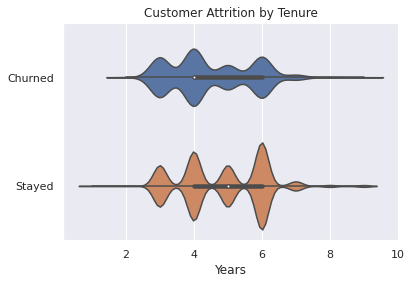

In [86]:
# Calculate the zcores of tenure
tenure_zcores = zscore(a=client_df['num_years_antig'])
# Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zcores)
# Extract Columns of interest
churn_tenure = client_df[['churn','num_years_antig']]
# Add z-score column
churn_tenure['z_score'] = list(abs_tenure_zscores)
# Remove outliers 
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize tenure by retained customer and churner
vio = sns.violinplot( y=churned_tenure_filtered["churn"], x=churned_tenure_filtered["num_years_antig"] )
# Settings
vio.set(xlabel='Years', ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()

The median age of churners is 4 years
Customers are more likely to churn during the 4th year than the 7th year
The median age of retained customers is 5 years

In [87]:
# Most popular electricty campaign
ele_nm = client_df.loc[(client_df['churn']>='Stayed') & (client_df['net_margin']>0),['id', 'origin_up','net_margin']]

ele_nm.value_counts(subset=['origin_up'])

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    6155
kamkkxfxxuwbdslkwifmmcsiusiuosws    4002
ldkssxwpmemidmecebumciepifcamkci    2801
MISSING                               58
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
dtype: int64

In [88]:
# Highest netting electricity subscription campaign
print(ele_nm.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1230753.01
kamkkxfxxuwbdslkwifmmcsiusiuosws     627964.96
ldkssxwpmemidmecebumciepifcamkci     564951.43
MISSING                               16386.00
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


The most popular electricity campaign is lxidpiddsbxsbosboudacockeimpuepw which has brought 6,155 current customers.
The electricity campaign attributable to the highest total net margin is lxidpiddsbxsbosboudacockeimpuepw. Netting $1,230,753.01.

In [89]:
# Select current customers with positive net margins
top_customers = client_df.loc[(client_df['churn']>='Stayed') & (client_df['net_margin']>0),['id','num_years_antig','net_margin']]

# Top 10 customers by net margin
top_customers.sort_values(by=['net_margin'],ascending=False).head(10)

,id,num_years_antig,net_margin
10718,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
12348,818b8bca0a9d7668252d46b978169325,4,4346.37
7794,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
12624,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65
4876,9590c7a6100ae76ec078aa177ffb8d0d,3,3215.03
3478,e7bdc7743d73a9bf94cc3c6a293fca93,4,2711.19
4958,9a0411074f84ea385f555943f27a2d81,3,2653.59
7236,41b7c011f9d87044bb2e297264e95080,6,2625.38
10685,e5636f7ada7a80747af18b285632767e,10,2467.98
9345,078b4e5f8ea9a2f5f4c667f2d2236791,4,2340.78


These are the most profitable customers for PowerCo in terms of net margin. Beware most of them are within the likely tenure of attrition. Time for a marketing campaign!